<a href="https://colab.research.google.com/github/Aman151295/Multiple_regression_Statement/blob/main/Startup_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import scipy 
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.formula.api as smf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
Start_up = pd.read_csv("/content/50_Startups.csv")
print('50_Start_up' , Start_up)

50_Start_up     R&D Spend  Administration  Marketing Spend       State     Profit
0   165349.20       136897.80        471784.10    New York  192261.83
1   162597.70       151377.59        443898.53  California  191792.06
2   153441.51       101145.55        407934.54     Florida  191050.39
3   144372.41       118671.85        383199.62    New York  182901.99
4   142107.34        91391.77        366168.42     Florida  166187.94
5   131876.90        99814.71        362861.36    New York  156991.12
6   134615.46       147198.87        127716.82  California  156122.51
7   130298.13       145530.06        323876.68     Florida  155752.60
8   120542.52       148718.95        311613.29    New York  152211.77
9   123334.88       108679.17        304981.62  California  149759.96
10  101913.08       110594.11        229160.95     Florida  146121.95
11  100671.96        91790.61        249744.55  California  144259.40
12   93863.75       127320.38        249839.44     Florida  141585.52
13   919

In [5]:
Start_up.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [6]:
New_columns = {'R&D Spend' : 'Rd_Spend',
    'Administration' : 'Admnstn',
    'Marketing Spend' : 'Marktn_Spend'}


Start_up = Start_up.rename(columns = New_columns)
print('Start_up : ', Start_up)

Start_up :       Rd_Spend    Admnstn  Marktn_Spend       State     Profit
0   165349.20  136897.80     471784.10    New York  192261.83
1   162597.70  151377.59     443898.53  California  191792.06
2   153441.51  101145.55     407934.54     Florida  191050.39
3   144372.41  118671.85     383199.62    New York  182901.99
4   142107.34   91391.77     366168.42     Florida  166187.94
5   131876.90   99814.71     362861.36    New York  156991.12
6   134615.46  147198.87     127716.82  California  156122.51
7   130298.13  145530.06     323876.68     Florida  155752.60
8   120542.52  148718.95     311613.29    New York  152211.77
9   123334.88  108679.17     304981.62  California  149759.96
10  101913.08  110594.11     229160.95     Florida  146121.95
11  100671.96   91790.61     249744.55  California  144259.40
12   93863.75  127320.38     249839.44     Florida  141585.52
13   91992.39  135495.07     252664.93  California  134307.35
14  119943.24  156547.42     256512.92     Florida  132602

In [7]:
Start_up.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rd_Spend      50 non-null     float64
 1   Admnstn       50 non-null     float64
 2   Marktn_Spend  50 non-null     float64
 3   State         50 non-null     object 
 4   Profit        50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [8]:
Start_up.isnull().sum()

Rd_Spend        0
Admnstn         0
Marktn_Spend    0
State           0
Profit          0
dtype: int64

In [9]:
# Now we will convert it into 'int64' type.
Start_up['Admnstn'] = Start_up['Admnstn'].astype('float64')
Start_up.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rd_Spend      50 non-null     float64
 1   Admnstn       50 non-null     float64
 2   Marktn_Spend  50 non-null     float64
 3   State         50 non-null     object 
 4   Profit        50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


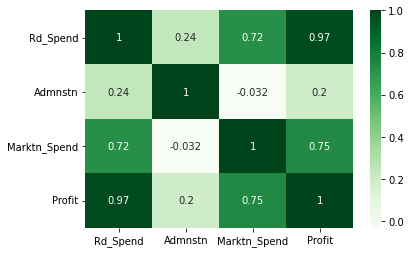

In [10]:
Start_up.corr()

sns.heatmap(Start_up.corr(), cmap = 'Greens', annot= True)

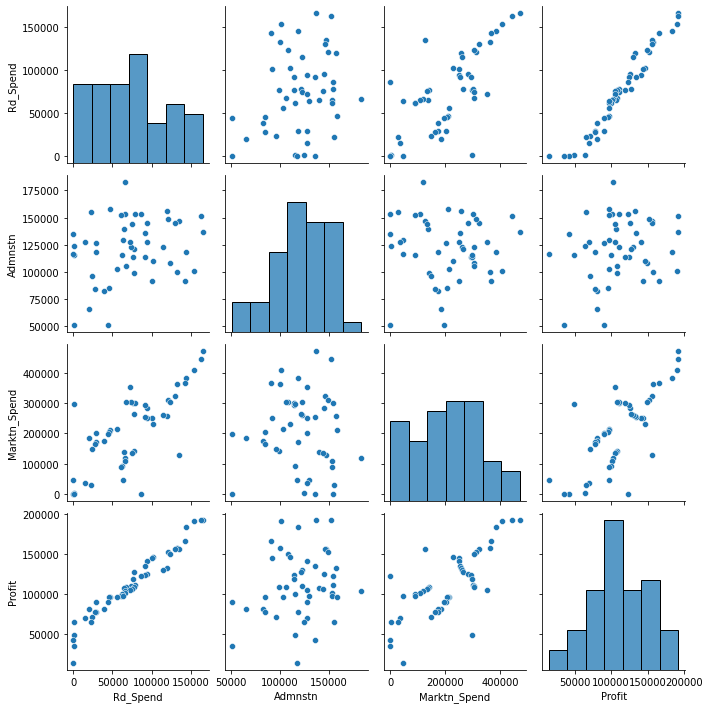

In [11]:
sns.pairplot(Start_up)

R&D Spend vs Administartion =  0.24 
R7D Spend vs Marketing Spend = 0.72 , Here we collinearity issue. 
and it's highly correlated with Profit 0.97

Administration vs R&D = 0.24
Administration vs marketing spend = -0.032
Administration Vs response Variable (Profit) = 0.2

Marketing Spend vs R&D = 0.72, highly Correlated
Marketing Spend vs Administration = -0.032, No collinearity
Marketing vs Profit  = 0.75









In [19]:
#Seprating the Predictors & Response.

Predictors_X = Start_up[['Rd_Spend', 'Admnstn', 'Marktn_Spend']]

Response_Y = Start_up['Profit']

In [18]:
#As we are going ahead to highly correlated variables with the help of VIF(Variance Inflation Factor)


from statsmodels.stats.outliers_influence import  variance_inflation_factor


vif_data = pd.DataFrame()
vif_data['Predictor'] = Predictors_X.columns


#Calculating VIF for each feature
vif_data['VIF_Value'] = [variance_inflation_factor(Predictors_X.values, i) for i in range(len(Predictors_X.columns))]
print(vif_data)

      Predictor  VIF_Value
0      Rd_Spend   8.384571
1       Admnstn   4.026406
2  Marktn_Spend   7.593984


As from Above observations, we can say that none of the VIF values are above 20...
So we can conclude that all values are significant

In [17]:
Desc = Start_up.describe()

Desc.loc['+3_Std'] = Desc.loc['mean'] + (Desc.loc['std'] *3)
Desc.loc['-3_Std'] = Desc.loc['mean'] - (Desc.loc['std'] *3)

print(Desc)



             Rd_Spend        Admnstn   Marktn_Spend         Profit
count       50.000000      50.000000      50.000000      50.000000
mean     73721.615600  121344.639600  211025.097800  112012.639200
std      45902.256482   28017.802755  122290.310726   40306.180338
min          0.000000   51283.140000       0.000000   14681.400000
25%      39936.370000  103730.875000  129300.132500   90138.902500
50%      73051.080000  122699.795000  212716.240000  107978.190000
75%     101602.800000  144842.180000  299469.085000  139765.977500
max     165349.200000  182645.560000  471784.100000  192261.830000
+3_Std  211428.385047  205398.047866  577896.029978  232931.180213
-3_Std  -63985.153847   37291.231334 -155845.834378   -8905.901813


In [20]:
# Model Building

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

Regr = LinearRegression()

X_train, X_Test, Y_train, Y_test = train_test_split(Predictors_X, Response_Y, test_size = 0.2, random_state = 1)

Regr.fit(X_train,Y_train)



LinearRegression()

In [21]:
#With the data now fitted to the model, we can explore the output

# The first thing we should do is look at the intercept of the model

intercept = Regr.intercept_
Coefficient = Regr.coef_

print('Intercept :', round(intercept, 3), '\n','Coefficient :', Coefficient)

Intercept : 49659.158 
 Coefficient : [ 0.7742023  -0.00877164  0.02934891]


In [22]:
# Get multiple predictions

Y_predict = Regr.predict(X_Test)
print(Y_predict)

[114729.00768236  90569.03231312  75952.34861633  70179.81117586
 179539.15187896 171638.15637459  49624.94193162 102253.12475568
  58381.67907     98240.74724733]


# **Model Evaluation**

In [24]:
#Test for heteroscedasticity

import statsmodels.formula.api as smf

Model = smf.ols( 'Profit ~ Rd_Spend+Admnstn+Marktn_Spend' , data=Start_up).fit()
#View model summary
print(Model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Mon, 24 Jan 2022   Prob (F-statistic):           4.53e-30
Time:                        17:22:59   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     5.012e+04   6572.353      7.626   

In [26]:
import statsmodels.stats.api as sms

_,p_val,_,f_pval = sms.het_breuschpagan(Model.resid, Model.model.exog)
print(p_val, f_pval)
print('-'*100)

if p_val > 0.05:
  print('We fail to reject the null hypothesis , so there is no heterosecdasticity')
else: print('We have heterosecdasticity')

0.37291203675384504 0.3917022374261764
----------------------------------------------------------------------------------------------------
We fail to reject the null hypothesis , so there is no heterosecdasticity


# **Residual Plot ( Fitted Values vs Residuals)**

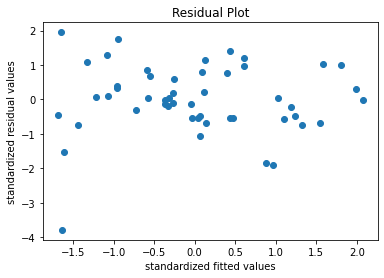

In [27]:
Fit_Values = stats.zscore(Model.fittedvalues)
resid      = stats.zscore(Model.resid)

plt.scatter(Fit_Values,resid)
plt.title('Residual Plot')
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
plt.show() 

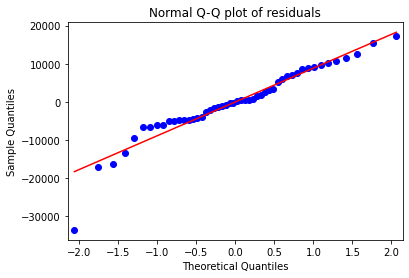

The mean of the residuals is -8.149e-12


1.2817662007267283

In [28]:
#Testing for Autocorrelation

# check for the normality of the residuals
import statsmodels.api as sa
sa.qqplot(Model.resid, line='s')
plt.title("Normal Q-Q plot of residuals")
plt.show()

#Also check that the mean of the residuals is approx. 0.
mean_residuals = sum(Model.resid)/ len(Model.resid)
print("The mean of the residuals is {:.4}".format(mean_residuals))

from statsmodels.stats.stattools import durbin_watson

durbin_watson(Model.resid)


# **Model Deletion Diagnostics (checking Outliers or Influencers)**

In [46]:
# 1. Cook's Distance: If Cook's distance > 1, then it's an outlier
# Get influencers using cook's distance

#create instance of influence
influence = Model.get_influence()

cooks, _ = influence.cooks_distance
cooks

#By default, the cooks_distance() function displays an array of values for Cook’s distance for each observation followed by an array of corresponding p-values.

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.


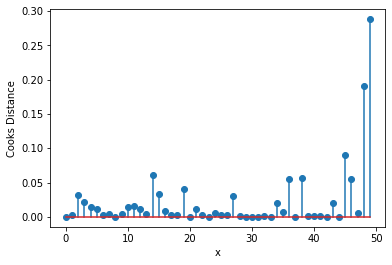

In [47]:
import matplotlib.pyplot as plt
import numpy as np

plt.stem(np.arange(len(Start_up)), cooks)
plt.xlabel('x')
plt.ylabel('Cooks Distance')
plt.show()






In [44]:
import statsmodels.formula.api as smf

Model2 = smf.ols( 'Profit ~ Rd_Spend+Marktn_Spend+Admnstn' , data=Start_up).fit()
#View model summary
print(Model2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Mon, 24 Jan 2022   Prob (F-statistic):           4.53e-30
Time:                        17:37:08   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     5.012e+04   6572.353      7.626   